In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 12.8 MB/s eta 0:00:00a 0:00:01


In [38]:
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

In [14]:
c=cv2.imread("/kaggle/input/human-faces-object-detection/images/00000047.jpg")
c.shape

(891, 1300, 3)

In [70]:
df="/kaggle/input/human-faces-object-detection/images"
img_data=[]
for file in os.listdir(df):
    data=os.path.join(df,file)
    cv=cv2.imread(data)
    img_rgb = cv2.cvtColor(cv, cv2.COLOR_BGR2RGB)

    cv_resize=cv2.resize(img_rgb,(556,556))
    img_data.append(cv_resize)
img_arr=np.array(img_data)

In [42]:
model=YOLO('yolov8s.pt')
model2=torch.hub.load('ultralytics/yolov5','yolov5s',pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0

requirements: AutoUpdate success ✅ 16.0s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-9-3 Python-3.10.14 torch-2.4.0+cpu CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 41.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [36]:
# img_arr.dtypes

In [49]:
results=model(img_arr[0])
results2=model2(img_arr[36])


0: 640x640 1 person, 384.5ms
Speed: 3.6ms preprocess, 384.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


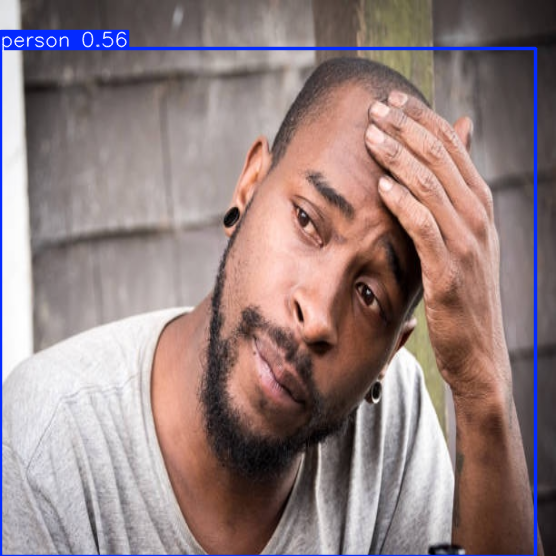

In [50]:
results2.show()

# # casscade classifier

In [81]:
model_casscade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [82]:
if model_casscade.empty():
    raise IOError(f"Failed to load cascade classifier from {cv2.data.haarcascades +' haarcascade_frontalface_default.xml'}")


In [90]:
color_img=cv2.cvtColor(img_arr[36], cv2.COLOR_BGR2GRAY)
img_box=model_casscade.detectMultiScale(color_img,scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w ,h) in img_box:
    cv2.rectangle(img_arr[36], (x, y),(x + w,y + h),(250, 0, 0), 2)

img_rgb=cv2.cvtColor(img_arr[36],cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [91]:
plt.imshow(img_arr[36])
plt.show()

In [92]:
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained cascade classifier for face detection
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
model_cascade = cv2.CascadeClassifier(cascade_path)

# Load an image (ensure img_arr is a list containing images)
# img_arr = [cv2.imread('path_to_image.jpg')]  # Replace with your image path

# Check if the image is loaded correctly
if img_arr[36] is None:
    raise IOError("Failed to load image.")

# Convert the image to grayscale
color_img = cv2.cvtColor(img_arr[36], cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Perform object detection
img_box = model_cascade.detectMultiScale(color_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected objects on the original image
for (x, y, w, h) in img_box:
    cv2.rectangle(img_arr[36], (x, y), (x + w, y + h), (250, 0, 0), 2)

# Convert the image from BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img_arr[36], cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axis
plt.show()
